# Prawo Benforda
## Antoni Perużyński

## Imports

In [41]:
#pip install sigfig

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [42]:
def toInterval10To100(x): 
  while (x<10 or x>=100):
    if x < 10:
      x *=10
    elif x >= 100:
      x/=10
  return x

In [43]:
from scipy.stats import variation 

def stats (data):
  print("Mean", data.mean())
  print("Varation", data.var())
  print("Std", data.std())
  print("Median", data.median())
  print("Mode", data.mode())
  print("Skew", data.skew())
  print("Kurtosis", data.kurtosis())
  print("Variation", variation(data))

## Testy statystyczne

### Test zgodności Chi^2

In [69]:
def chi2 (theoryDist, expDist):
    chiSquareStat = 0
    for i in range(len(theoryDist)):
        chiSquareStat += (expDist[i]-theoryDist[i])**2/theoryDist[i]
    #print("\nChi-squared Test Statistic = {:.3f}".format(chiSquareStat))   
    return chiSquareStat

### Test dla wskaźnika struktury

In [46]:
# def structureIndicator(theoryDist, expDist):
#     strIndStat = 0
#     for i in range(len(theoryDist)):
#         strIndStat +=
#     return strIndStat

### Test Kołmogorowa-Smirnowa

In [47]:
def KolmogorowSmirnow(theoryDist, expDist, n):
    KSStat = math.sqrt(n)
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    D=max(np.absolute(np.array(tD)-np.array(eD)))
    KSStat *= D
    return KSStat

### Test Podobieństwa

In [ ]:
def Measure_Similaristy_1(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_1 =[]
    M1 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_1.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.fabs((data_percentage[i]-probability_measure_similaristy_list_1[i])/probability_measure_similaristy_list_1[i])
        
    
    M1 = (100/len(data_percentage))*sum
    
    
    return M1

In [ ]:
def Measure_Similaristy_2(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_2 =[]
    M2 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_2.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_2[i]),2)
        
    
    M2 = (math.sqrt(sum)/len(data_percentage))
    
    
    return M2

In [ ]:
def Measure_Similaristy_3(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_3 =[]
    M3 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_3.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_3[i]),2)
        
    
    M3 = (math.sqrt(sum/len(data_percentage)))
    
    
    return M3

### Test Odległości 

In [48]:
def distanceTest(theoryDist, expDist):
    return max(np.absolute(np.array(theoryDist)-np.array(expDist)))

## Load data

In [49]:
def load_data(filename):
        df=pd.read_excel(filename)
        return df

## Benford digits

In [50]:
def count_first_digit(data):
    # Get only non-zero values
    data = data[data>=1]

    # Get the first digits
    first_digits = list(map(lambda x: int(str(x)[0]), data))
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(9)
    digit = []
    for i in range(1, 10):
        empirical_counts[i - 1] = first_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [51]:
def count_second_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[1]), dataMore10))
    for i in data[data<10]:
        second_digits.append(0)
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [52]:
def count_two_first_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[:2]), dataMore10))

    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(90)
    digit = []
    for i in range(10, 100):
        empirical_counts[i-10] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [53]:
def count_last_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    last_digits = list(map(lambda x: int(str(x)[-1]), data))
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = last_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

## Theoretical Benford Distributions

In [54]:
def theoretical_1st_number_counts():
    benford_first=[]
    for i in range(1,10):
        benford_first.append(math.log10(1+1/i))
    return benford_first

In [55]:
def theoretical_2nd_number_counts():
    benford_second=[]
    for i in range(0,10):
        suma=0
        for j in range (1,10):
            suma = suma + math.log10(1+(1/(10*j+i)))
        benford_second.append(suma)
    return benford_second

In [56]:
def theoretical_two_1st_number_counts():
    return [round(math.log(1+(i)**(-1), 10), 6)for i in range(10,100)]

## Program

In [57]:
df=load_data('Poland_COVID.xlsx')
df=df.dropna()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['new_cases']=df['new_cases'].astype(int)

In [58]:
empirical_counts, empirical_frequency, total_count, digit = count_first_digit(df['new_cases'])
empirical_counts2, empirical_frequency2, total_count2, digit2 = count_second_digit(df['new_cases'])
empirical_two_first_counts, empirical_two_first_frequency2, total_two_first_count2, digit_two_first = count_two_first_digit(df['new_cases'])

In [59]:
theoretical_1st_number = theoretical_1st_number_counts()
theoretical_2nd_number = theoretical_2nd_number_counts()
theoretical_two_1st_number = theoretical_two_1st_number_counts()

## Visualization

In [60]:
def first_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(1,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Pierwsza cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

In [61]:
def second_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(0,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

In [62]:
def two_first_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(10,100)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(20, 5))
    plt.xticks(np.arange(10, 100, 10.0))
    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

## First digit d1

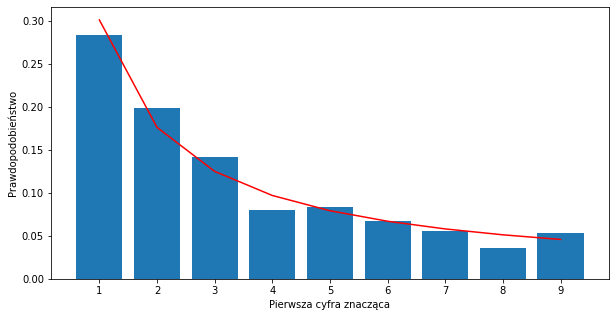

In [63]:
first_digit_chart(empirical_frequency, theoretical_1st_number)

In [73]:
# First wat of chi2
# x = sum([(o-e)**2./e for o,e in zip(empirical_frequency,theoretical_1st_number)])
# x*total_count


# x= np.array(theoretical_1st_number)*total_count
# chi2(x, empirical_counts)

# Third way of chi2
# from scipy.stats import chisquare
# chisquare(empirical_counts, f_exp=x)

In [74]:
# Forth way of chi2
chi2(theoretical_1st_number,empirical_frequency) * total_count

11.285802118044698

In [75]:
KolmogorowSmirnow(theoretical_1st_number,empirical_frequency, total_count)

0.6164601891286423

In [77]:
distanceTest(theoretical_1st_number, empirical_frequency)

0.02309018705618779

## Second digit d2

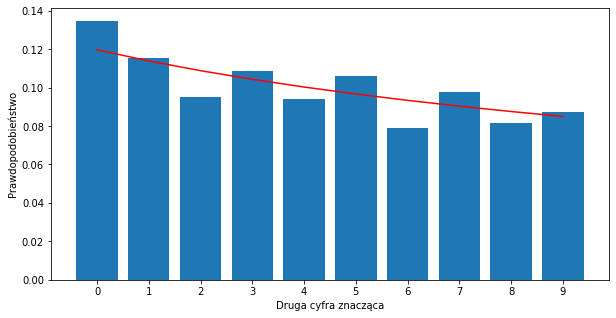

In [78]:
second_digit_chart(empirical_frequency2, theoretical_2nd_number)

## Two firsts digits d1d2

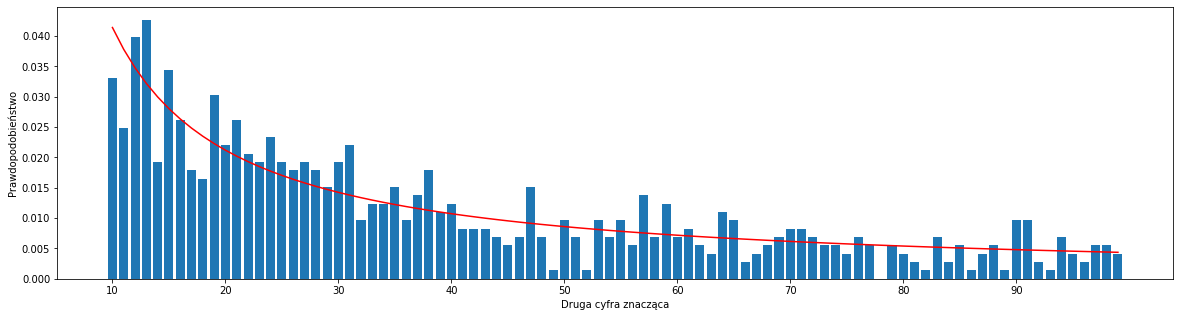

In [79]:
two_first_digit_chart(empirical_two_first_frequency2, theoretical_two_1st_number)

In [ ]:

# a=list(map(lambda x: int(str(x)[0]), data))

# sum_list = np.zeros(9)
# for i in range(len(data)):
#     for j in range(1,10):
#         if a[i]==j:
#             sum_list[j-1] += data.loc[i]
# sum_list

array([5318238., 4590848., 1748712., 1087309.,  959497., 1156052.,
        587221.,  601611.,  277694.])

In [ ]:
# data = df['new_cases']
# #data=data[data>0]

# a=list(map(lambda x: int(str(x)[:2]), data))


# for i in range(len(a)):
#     if a[i]<10:
#         a[i] *= 10

# #print(a)
# #print(data)
# sum_list = np.zeros(90)
# for i in range(len(data)):
#     for j in range(10,100):
#         if a[i]==j:
#             sum_list[j-10] += data.loc[i]
#             print("i wynosi:", i, "j wynosi:", j, "dodawany element to:", data.loc[i], "a suma:", sum_list[j-10])
# #print(sum_list)
# plt.plot(sum_list)

In [ ]:
# def count_second_digit(data):
#     # Get only non-zero values
#     data = data[data>=0]

#     # Get the first digits
#     dataMore10 = data[data>=10]
#     second_digits = list(map(lambda x: int(str(x)[1]), dataMore10))
#     for i in data[data<10]:
#         second_digits.append(0)
    
    
#     # Count occurences. Make sure every position is for [1-9]
#     empirical_counts = np.zeros(10)
#     digit = []
#     for i in range(0, 10):
#         empirical_counts[i] = second_digits.count(i)
#         digit.append(i)

#     # Total amount
#     total_count = sum(empirical_counts)
#     # Make percentage
#     empirical_frequency = [(i / total_count) for i in empirical_counts]
#     # Return
#     return(empirical_counts, empirical_frequency, total_count, digit)